In [1]:
import pandas as pd
bmi = pd.read_csv('D:\\Artificial Intelligence\\Machine Learning\\_projects\\nn_bmi_prediction\\data\\bmi.csv')
bmi.info()
bmi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


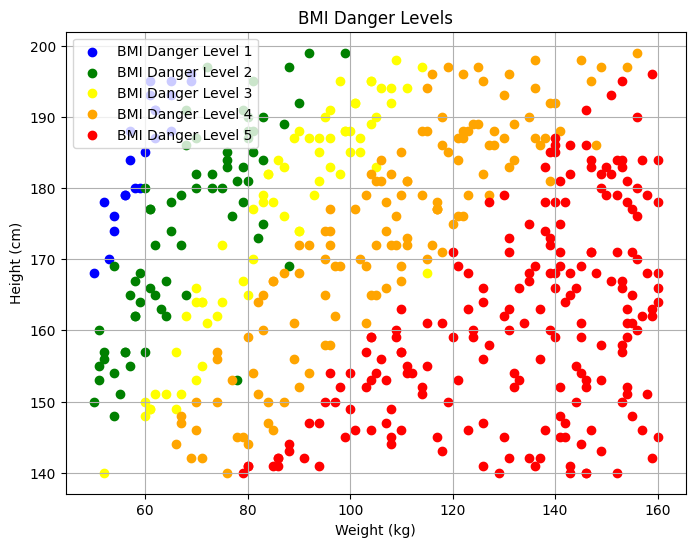

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Define colors for each BMI danger level
colors = {1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange', 5: 'red'}

# Plot the dataframe
plt.figure(figsize=(8, 6))
for level, color in colors.items():
    subset = bmi[bmi['Index'] == level]
    plt.scatter(subset['Weight'], subset['Height'], color=color, label=f'BMI Danger Level {level}')

# Add labels and legend
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('BMI Danger Levels')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [77]:
bmi["Gender"] = (bmi["Gender"] == "Male").astype(int)
bmi_np = np.array(bmi.drop(["Index"], axis=1))
bmi.info()
bmi.head()
print(bmi_np)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  500 non-null    int32
 1   Height  500 non-null    int64
 2   Weight  500 non-null    int64
 3   Index   500 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 13.8 KB
[[  1 174  96]
 [  1 189  87]
 [  0 185 110]
 ...
 [  0 141 136]
 [  1 150  95]
 [  1 173 131]]


In [78]:
y = np.array(bmi["Index"])
y_np = np.array(to_categorical(y, 6))
print(y)
print(y_np)

[4 2 4 3 3 3 5 5 3 4 2 4 3 2 2 5 5 5 5 5 5 5 4 5 2 3 3 1 5 5 5 1 1 5 5 4 3
 4 5 2 4 5 2 5 4 2 4 4 3 5 5 1 5 4 4 3 4 5 3 5 0 5 0 2 5 5 4 2 4 4 2 4 5 2
 3 4 4 4 4 0 3 5 3 4 5 0 5 5 5 5 5 3 3 2 4 5 4 5 1 0 4 5 5 4 4 4 5 5 4 3 4
 5 4 2 4 3 2 5 5 5 4 4 4 5 5 4 4 4 5 2 5 2 5 4 5 5 5 3 5 5 2 4 5 5 5 4 3 5
 3 3 0 3 3 5 5 4 3 5 3 4 2 2 3 5 4 2 4 5 3 2 4 5 5 4 4 4 4 3 5 3 3 4 4 2 3
 3 5 3 5 4 5 5 4 5 5 5 4 4 5 5 1 3 4 4 5 4 5 4 3 4 4 5 5 5 0 5 5 5 5 5 2 5
 4 5 0 5 3 4 5 5 4 2 3 3 4 3 5 5 2 5 3 2 1 5 0 5 3 5 3 4 3 5 5 5 5 2 4 5 5
 4 5 5 5 2 4 5 5 5 5 1 5 5 4 0 3 3 4 2 3 1 1 5 5 4 4 4 4 5 2 5 4 3 3 4 5 5
 2 4 3 4 5 4 2 4 5 4 5 5 1 5 5 5 5 2 2 5 3 5 4 5 4 4 5 5 4 2 2 4 3 3 5 4 2
 2 2 2 5 5 4 5 3 4 4 3 4 4 2 2 5 2 2 2 2 5 0 3 4 5 1 4 1 4 5 4 5 5 3 4 5 4
 3 5 1 2 4 5 5 5 5 3 5 1 4 5 5 2 5 4 3 2 2 2 2 3 5 3 3 5 3 5 3 4 2 4 4 5 2
 5 5 5 1 4 5 5 5 4 5 2 5 2 1 5 5 4 1 1 4 4 4 4 2 5 5 4 2 5 5 5 1 5 4 2 5 5
 4 5 4 4 5 5 5 4 5 0 2 2 4 2 4 5 4 5 1 5 2 5 3 5 5 3 5 5 2 5 3 4 5 2 2 5 5
 4 5 4 4 4 5 2 4 5 2 5 0 

In [79]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

In [81]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bmi_np, y_np, test_size=0.2, random_state=42)
print(X_train[0])
print(y_train[0])


[  1 161  89]
[0. 0. 0. 0. 1. 0.]


In [84]:
# 2. Model Architecture for Tabular Data
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# 3. Model Compilation
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [85]:
# 4. Model Training
model.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.1)

# 5. Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2345 - loss: 34.1655 - val_accuracy: 0.5000 - val_loss: 6.9602
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2955 - loss: 27.9057 - val_accuracy: 0.5500 - val_loss: 5.1447
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2707 - loss: 23.4396 - val_accuracy: 0.5500 - val_loss: 3.2950
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2575 - loss: 19.1447 - val_accuracy: 0.5500 - val_loss: 2.8787
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3549 - loss: 13.2200 - val_accuracy: 0.5750 - val_loss: 2.1511
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3403 - loss: 14.1341 - val_accuracy: 0.5750 - val_loss: 1.8696
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3298 - loss: 11.4606 - val_accuracy: 0.5750 - val_loss: 1.8567
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3965 - loss: 9.5730 - val_accuracy: 0.5500 - v

In [102]:
# Assuming model is your trained model object and X_test is your test data
predictions = model.predict(np.array([[1, 172,80]]))
print(predictions[0])

predicted_class = np.argmax(predictions[0])

print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[0.15340728 0.15809172 0.16919594 0.17752607 0.17498074 0.16679834]
Predicted class: 3


In [60]:
bmi

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61
...,...,...,...
495,0,150,153
496,0,184,121
497,0,141,136
498,1,150,95
